# Research assignment 4


Andrew Martin 

Interaction Between Funding for Low Income Students and Research Levels

03/07/24

In [65]:
%set graph_format svg

set error:
    parsing errors:
	[line  2]: 'graph_format svg'


In [66]:
qui log using w8lesson.log, replace

log file already open
r(604);


In [67]:
set more off

(-set more- irrelevant in this version of Stata)


In [68]:
insheet using grants2015_college_affordability20200218.csv, clear
eststo clear

(8 vars, 581 obs)


In [69]:
ds

year          stabbr        hgroup        igrnt_low_~c
instnm        control       highdeg       sgrnt_low_~c


### DESCRIPTION OF VARIABLES USED
1. [Interval Ratio] igrnt_low_~c = Grants Provided to Low Income Students [Dependent Variable]
2. [Nominal] hgroup = Research Level of Institution [Independent Variable]
3. [Nominal] highdeg = Highest Degree Offered [Independent Variable]
4. [Interval Ration] sgrnt_low_~c = Student Grant for Low Income Students [Independent Variable]

In [70]:
label variable hgroup "Research Level"
label variable highdeg "Highest Degree Offered"

In [71]:
codebook hgroup highdeg


-------------------------------------------------------------------------------
hgroup                                                           Research Level
-------------------------------------------------------------------------------

                  Type: String (str19)

         Unique values: 4                         Missing "": 0/581

            Tabulation: Freq.  Value
                           34  "AAU Public"
                           72  "HRA Public"
                           37  "Non-AAU VHRA Public"
                          438  "Other RU Public"


-------------------------------------------------------------------------------
highdeg                                                  Highest Degree Offered
-------------------------------------------------------------------------------

                  Type: Numeric (byte)

                 Range: [2,4]                         Units: 1
         Unique values: 3                         Missing .: 0/581

        

NOTE: Log Financial Variables and Use l-versions

In [72]:
gen lgrntlow = log(igrnt_low_inc)

(3 missing values generated)


In [73]:
gen lsgrntlow = log(sgrnt_low_inc)

(4 missing values generated)


In [74]:
codebook lgrntlow lsgrntlow


-------------------------------------------------------------------------------
lgrntlow                                                            (unlabeled)
-------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [.31608146,11.011695]         Units: 1.000e-08
         Unique values: 578                       Missing .: 3/581

                  Mean: 8.27232
             Std. dev.: 1.24853

           Percentiles:     10%       25%       50%       75%       90%
                        6.68727    7.6421   8.44941   9.03796   9.65005

-------------------------------------------------------------------------------
lsgrntlow                                                           (unlabeled)
-------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [1.08846,10.599433]           Units: 1.000e-07
         Unique

In [76]:
label variable lgrntlow "Institutional Grants Provided to Low Income Students"
label variable lsgrntlow "State Grants to Low Income Students"
codebook lgrntlow lsgrntlow


-------------------------------------------------------------------------------
lgrntlow                   Institutional Grants Provided to Low Income Students
-------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [.31608146,11.011695]         Units: 1.000e-08
         Unique values: 578                       Missing .: 3/581

                  Mean: 8.27232
             Std. dev.: 1.24853

           Percentiles:     10%       25%       50%       75%       90%
                        6.68727    7.6421   8.44941   9.03796   9.65005

-------------------------------------------------------------------------------
lsgrntlow                                   State Grants to Low Income Students
-------------------------------------------------------------------------------

                  Type: Numeric (float)

                 Range: [1.08846,10.599433]           Units: 1.000e-07
         Unique

In [77]:
quietly {
rename hgroup hgroupstring
encode hgroupstring, gen(hgrouptemp)
recode hgrouptemp (1=1 "Highest") (2=3 "High") (3=2 "Very high") (4=4 "Some/None"), gen(hgroup)
qui label var igrnt_low "institutional grant $ per fte"
qui label var sgrnt_low "state grant $ per fte"
qui label var hgroup "research level"
}

In [78]:
tab hgroup


   research |
      level |      Freq.     Percent        Cum.
------------+-----------------------------------
    Highest |         34        5.85        5.85
  Very high |         37        6.37       12.22
       High |         72       12.39       24.61
  Some/None |        438       75.39      100.00
------------+-----------------------------------
      Total |        581      100.00


NOTE: Making a percentile --> Nominal Categories of 3

In [ ]:
NOTE: Do not have to convert the interval-ration into a nominal variable. For this work I'm leaving them as interval-ratio.

In [90]:
gen grantslowincom=.

replace grantslowincom=1 if igrnt_low_inc>=0 & igrnt_low_inc <=2079.92
replace grantslowincom=2 if igrnt_low_inc>=2079.93 & igrnt_low_inc <=8337.64
replace grantslowincom=3 if igrnt_low_inc>=8337.65

(581 missing values generated)
(146 real changes made)
(290 real changes made)
(145 real changes made)


In [91]:
label define grantslowincom 1 "0-25%" 2 "26%-75%" 3 "76%-100%", replace

label values grantslowincom grantslowincom

In [92]:
tab grantslowincom


grantslowin |
        com |      Freq.     Percent        Cum.
------------+-----------------------------------
      0-25% |        146       25.13       25.13
    26%-75% |        290       49.91       75.04
   76%-100% |        145       24.96      100.00
------------+-----------------------------------
      Total |        581      100.00


In [16]:
tab hgroup highdeg


  research |      Highest Degree Offered
     level |         2          3          4 |     Total
-----------+---------------------------------+----------
   Highest |         0          0         34 |        34 
 Very high |         0          0         37 |        37 
      High |         0          0         72 |        72 
 Some/None |         7         84        347 |       438 
-----------+---------------------------------+----------
     Total |         7         84        490 |       581 


NOTE: Matric Table Before Logging of Financial Variables (ie igrnt_low_~c sgrnt_low_~c)

In [38]:
pwcorr hgroup highdeg igrnt_low_~c sgrnt_low_~c


             |   hgroup  highdeg igrnt_~c sgrnt_~c
-------------+------------------------------------
      hgroup |   1.0000 
     highdeg |  -0.2089   1.0000 
igrnt_low_~c |  -0.5402   0.1754   1.0000 
sgrnt_low_~c |  -0.2641   0.1557   0.1046   1.0000 


NOTE: Matric Table After Logging of Financial Variables (ie igrnt_low_~c = lgrntlow & sgrnt_low_~c= lsgrntlow)

In [79]:
pwcorr hgroup highdeg lgrntlow lsgrntlow


             |   hgroup  highdeg lgrntlow lsgrnt~w
-------------+------------------------------------
      hgroup |   1.0000 
     highdeg |  -0.2089   1.0000 
    lgrntlow |  -0.4666   0.2513   1.0000 
   lsgrntlow |  -0.1144   0.2343   0.0850   1.0000 


NOTE: There is a clear difference between the two tables and t/f logging the finanical variable makes a significant change to outcome/analysis of data

## 1. Develop hypotheses about interactions between your independent variables [1 pt]

You can use the GSS data, Student aid data, or your own data

DEPENDENT VARIABLE: igrnt_low_~c (Institutional Grants Provided to Low Income Students)

INDEPENDENT VARIABLE 1: hgroup (Research Level)

INDEPENDENT VARIABLE 2: highdeg (Highest Degree Offered)

INDEPENDENT VARIABLE 3: sgrnt_low_~c (logged version = lsgrntlow) (State grants for low income students)

    A. Write at least one hypothesis involving one of the two following types of interactions
        1) nominal * nominal
        - N/A
        
        2) nominal * interval-ratio
        - igrnt_low_~c (Grants Provided to Low Income Students) * hgroup (Research Level)
        - Hypothesis: 
        
    B. State the predicted direction of association between your dependent variable and:
        1) each of the 2 independent variables by themselves
        - There will be an increase of state grants provided to low income students at colleges with a higher level of research.
        - There will be an increase of institutional grants provided to low income students at colleges that offer higher level of degrees.
        
        2) the interaction of the 2 indendent variables
        - Higher levels of research levels will contribute to their being higher level degrees being offered.
        
        3) you can predict that there is no association
        - N/A
        
    C. Write a couple sentences about the theoretical reasons (prior knowledge / research) for each of your predictions
        - Institutions that participate in higher amount of research often requrie a greater amount of student labor they are more likely to offer higher degrees.
        - The more research an institution conducts the greater access to state funds and internal funding that is available. This would suggest then that if there is more funding available through research levels that there will be more grants (state and institutional) for students to have access to.
        

## 2. Test your hypotheses [3 pts]

    A. For each hypothesized interactive relationship: use regression with the appropriate interaction syntax to estimate 1 model with uninteracted variables and 1 model with interacted variables. Use --esttab-- with %html magic to output a model with the 2 tables
    
    B. Use margins and marginsplot with the appropriate syntax to visually represent your regression adjusted estimates for given nominal categories or at given interval-ratio values

NOTE: reg with original financial variables

In [41]:
eststo: reg igrnt_low_~c hgroup highdeg sgrnt_low_~c


      Source |       SS           df       MS      Number of obs   =       581
-------------+----------------------------------   F(3, 577)       =     81.67
       Model |  1.1160e+10         3  3.7200e+09   Prob > F        =    0.0000
    Residual |  2.6281e+10       577  45547759.7   R-squared       =    0.2981
-------------+----------------------------------   Adj R-squared   =    0.2944
       Total |  3.7441e+10       580  64553619.6   Root MSE        =    6748.9

------------------------------------------------------------------------------
igrnt_low_~c | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
      hgroup |  -5081.342   346.7968   -14.65   0.000     -5762.48   -4400.204
     highdeg |   1397.238   710.3411     1.97   0.050     2.068146    2792.407
sgrnt_low_~c |  -.1029335   .0771347    -1.33   0.183    -.2544326    .0485656
       _cons |   20137.81   3207.627     6.28   0.

NOTE: regression with logged financial variables

In [80]:
eststo: reg lgrntlow lsgrntlow hgroup highdeg


      Source |       SS           df       MS      Number of obs   =       574
-------------+----------------------------------   F(3, 570)       =     60.85
       Model |  217.379412         3   72.459804   Prob > F        =    0.0000
    Residual |  678.732416       570  1.19075862   R-squared       =    0.2426
-------------+----------------------------------   Adj R-squared   =    0.2386
       Total |  896.111828       573  1.56389499   Root MSE        =    1.0912

------------------------------------------------------------------------------
    lgrntlow | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
   lsgrntlow |  -.0028154   .0345658    -0.08   0.935    -.0707074    .0650765
      hgroup |   -.636417   .0546132   -11.65   0.000    -.7436847   -.5291494
     highdeg |   .5042709   .1210486     4.17   0.000     .2665152    .7420267
       _cons |   8.629305   .5583953    15.45   0.

### Generating Tables Without & With Interaction Terms

NOTE: Generate the regression model WITHOUT the interaction terms

In [81]:
eststo: reg lgrntlow highdeg i.hgroup


      Source |       SS           df       MS      Number of obs   =       578
-------------+----------------------------------   F(4, 573)       =     50.40
       Model |  234.105428         4  58.5263571   Prob > F        =    0.0000
    Residual |  665.343885       573  1.16115861   R-squared       =    0.2603
-------------+----------------------------------   Adj R-squared   =    0.2551
       Total |  899.449314       577  1.55883763   Root MSE        =    1.0776

------------------------------------------------------------------------------
    lgrntlow | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
     highdeg |   .4513093   .1143419     3.95   0.000     .2267289    .6758898
             |
      hgroup |
  Very high  |  -.4151686   .2559969    -1.62   0.105    -.9179752    .0876381
       High  |  -.5923391   .2242296    -2.64   0.008    -1.032751   -.1519268
  Some/None  |  -1.6

NOTE: Generate the regression model WITH the interaction terms

In [84]:
eststo: reg lgrntlow c.igrnt_low_inc##i.hgroup c.sgrnt_low_inc##i.hgroup


      Source |       SS           df       MS      Number of obs   =       578
-------------+----------------------------------   F(11, 566)      =    102.15
       Model |  598.147272        11  54.3770247   Prob > F        =    0.0000
    Residual |  301.302042       566  .532335763   R-squared       =    0.6650
-------------+----------------------------------   Adj R-squared   =    0.6585
       Total |  899.449314       577  1.55883763   Root MSE        =    .72961

------------------------------------------------------------------------------
    lgrntlow | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
-------------+----------------------------------------------------------------
igrnt_low_~c |   .0000511   .0000155     3.30   0.001     .0000207    .0000816
             |
      hgroup |
  Very high  |  -.4901324   .4734719    -1.04   0.301    -1.420109     .439844
       High  |  -.4468065   .4030317    -1.11   0.268    -1.238427     .344814
  Some/None  |  -1.7

# QUESTION:
1.The table below changed appearance and I wasn't sure if that mattered or not. Also, it is unclear why it changed appearance since the only thing I did was re-rerun the code.

In [47]:
esttab, stats(r2 N, labels("R-Squared" "N")) cells(b(star fmt(3)) se(fmt(3) par)) /// 
nobase mlabels ("Model 1" "Model 2") starlevels(* .05 ** .01 *** .001) ///
coeflabels (igrnt_low_inc "Grant Low Income" highdeg "Highest Degree" hgroup "Research Level") noconstant


-------------------------------------------------------------------------------
> ---------------------------------------------
                      (1)             (2)             (3)             (4)      
>        (5)             (6)             (7)   
                  Model 1         Model 2            est3            est4      
>       est5            est6            est7   
                     b/se            b/se            b/se            b/se      
>       b/se            b/se            b/se   
-------------------------------------------------------------------------------
> ---------------------------------------------
Research L~l    -5099.452***                    -4970.395***                   
>                  -5081.342***                
                (330.152)                       (336.911)                      
>                  (346.797)                   
Highest De~e                     3474.052***     1296.212         950.860      
>                   139

In [29]:
%set graph_width = 11

In [28]:
%set graph_height = 8

graph size was (11, 4in), is now (11, 8).


In [86]:
sum lgrntlow lsgrntlow


    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
    lgrntlow |        578    8.272317    1.248534   .3160815   11.01169
   lsgrntlow |        577    7.637817    1.358711    1.08846   10.59943


NOTE: The dep. var has to be an interval ratio for this model

NOTE: Remember to logg any variables that are financial data

NOTE: The graph below is looking at the interaction relationships before if financial variables are not logged.


Variables that uniquely identify margins: sgrnt_low_inc hgroup


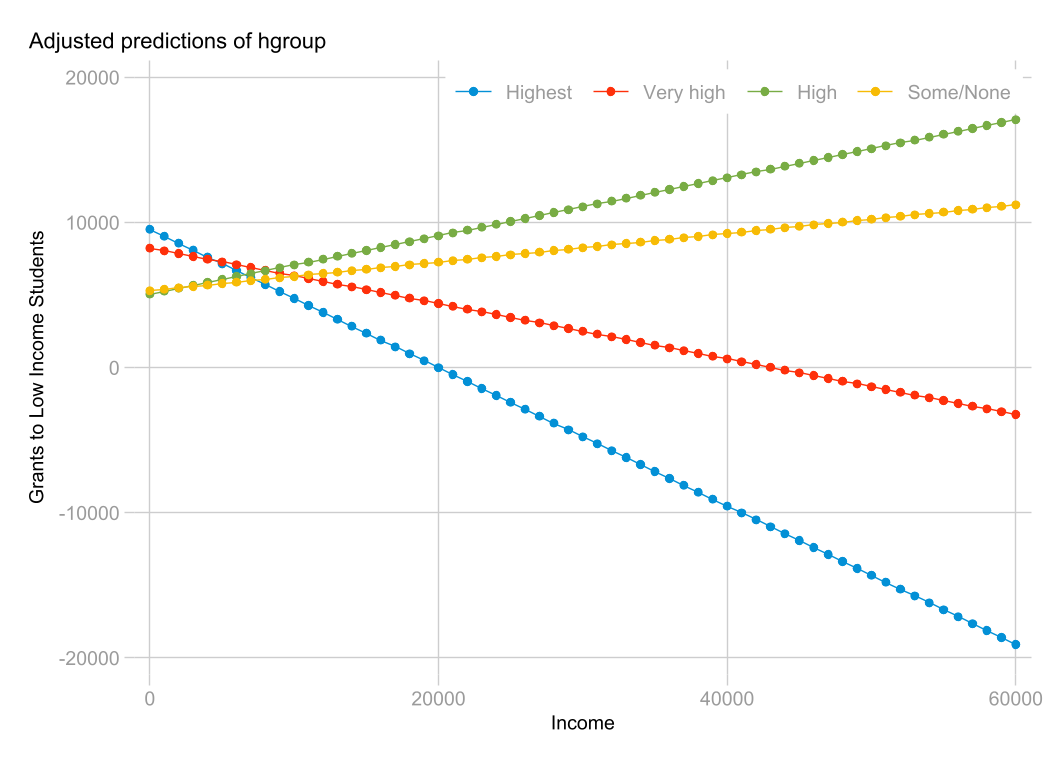

In [94]:
*Plotting margins for nominal - interval-ratio interaction terms*

quietly reg igrnt_low_inc c.grantslowincom##i.hgroup c.sgrnt_low_inc##i.hgroup

quietly margins hgroup, at(sgrnt_low_inc=(0(1000)60578.5)) atmeans
marginsplot, noci legend(on) xtitle("Income") ///
ytitle("Grants to Low Income Students") legend(rows(1) position(1) ring(0)) scheme(538w)

NOTE: Logged financial variables are lgrntlow lsgrntlow

NOTE: Relabled Names of Variables for Logged Financial Variables
lgrntlow "Institutional Grants Provided to Low Income Students"
lsgrntlow "State Grants to Low Income Students"

NOTE: The below graph is looking at the same interaction variables but now the financial variables have been logged. There is a clear relational
difference.


Variables that uniquely identify margins: lsgrntlow hgroup


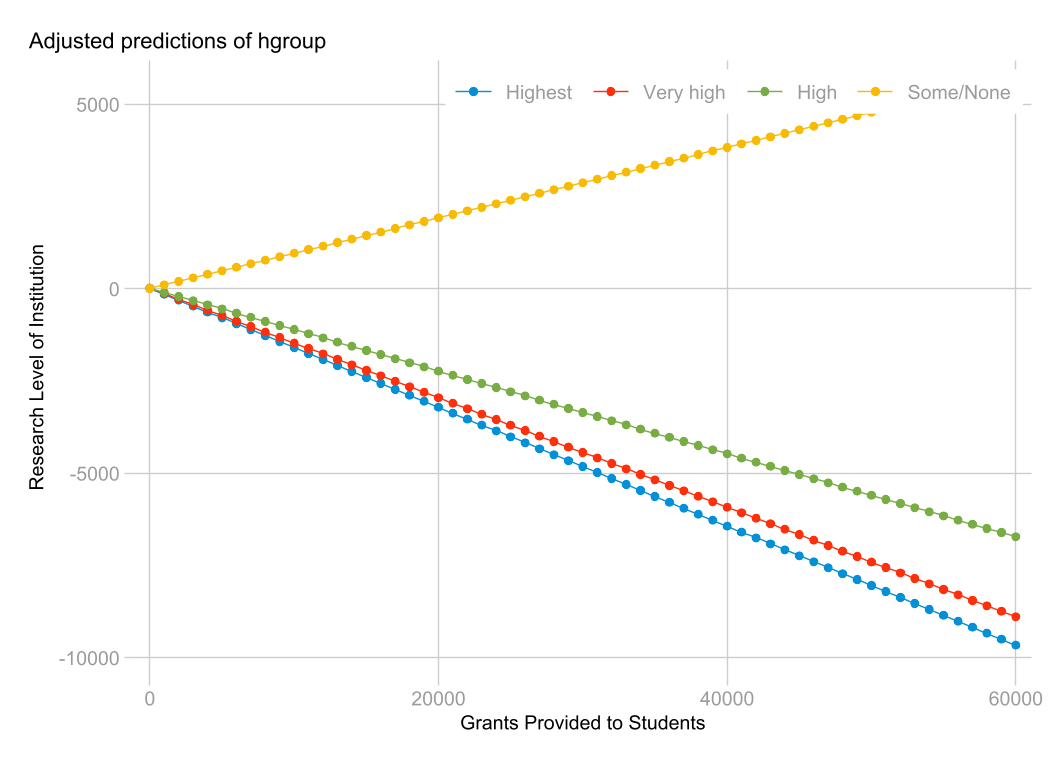

In [103]:
*Plotting margins for nominal - interval-ratio interaction terms*

quietly reg lgrntlow c.lsgrntlow##i.hgroup

quietly margins hgroup, at(lsgrntlow=(0(1000)60578.5)) atmeans
marginsplot, noci legend(on) xtitle("Grants Provided to Students") ///
ytitle("Research Level of Institution") legend(rows(1) position(1) ring(0)) scheme(538w)

## 3. Interpret your results [1 pt]

Write a couple sentences answering each of the following questions:

    A. Do the results support or contradict each of your hypotheses?
    - Once logging the financial variables it becomes clear that the amount of grants provided to students is impacted by the research level.
    
    B. Why do the regression coefficients support or contradict your hypotheses?
    - The regression coeffecients for logged financial variables (institutional and state grants for low income students) are shown to be lower coefficients than the coefficients when financial variables are not logged. 
    
    C. Why do your regression adjusted estimates from margins for nominal categories or given interval-ratio values support or contradict your hypotheses?
    - The adjusted estimates from margins for nominal categories support my hypothesis by demonstrating taht the amount of grants provided to students increase with the research level of the university.